<div style="text-align:center; font-family: Times New Roman, serif;">
<span style="color:Orange; font-family: Times New Roman, serif; font-weight: bold;">
<span class="cm-header cm-header-1">
Length of Stay Prediction</span>
</div>

The length of stay (LoS) in a hospital is the number of days a patient spends from admission to release. It is an important measure of medical and financial efficiency. A shorter LoS reduces infection risks, frees up beds, and lowers medical expenses, among other benefits.

#### The following pipeline is followed:
1. Problem Statement
2. Data
3. Evaluation Metrics
4. Domain Analysis
5. EDA
6. Pre-Processing
7. Features Selection
8. Modelling
9. Model Comparison Report
10. Hyperparameter Tuning
11. Conclusion

### 1.Problem Statement


-  Build a model to predict the length of stay 

### 2.Dataset
-  The below dataset is used for both training and testing purpose.                
-  The dataset is taken from Kaggle.

### 3. Evaluation Metrics
-  By looking at the stay column, we understand that the project falls in  multiclass classification type.
-  stay column is having 11 unique value, ranging from 0-10 days to over 100 days.
-  The metrics that we are considering here is accuracy Score.

### 4.Domain Analysis
The dataset contains following attributes. Many of them are self explainatory.

Case_id: A unique identifier for each case in the dataset

Hospital_code: The code assigned to the hospital where the case was treated

Hospital_type_code: The type of hospital

City_Code_Hospital: The code assigned to the city where the hospital is located

Hospital_region_code: The code assigned to the region where the hospital is located

Available_Extra_Rooms_in_Hospital: The number of extra rooms available in the hospital

Department: The department within the hospital where the patient was treated

Ward_Type: The type of ward where the patient was treated

Ward_Facility_Code: The code assigned to the ward where the patient was treated

Bed_Grade: The grade assigned to the bed where the patient was treated

patientid: A unique identifier for the patient

City_Code_Patient: The code assigned to the city where the patient is from

Type_of_Admission: The type of admission

Severity_of_Illness: A rating of the severity of the patient's illness

Visitors_with_Patient: The number of visitors allowed with the patient

Age: The age of the patient

Admission_Deposit: The amount of deposit paid at the time of admission

Stay: The length of stay in the hospital for the patient. This is our target. It is given in the form of groups such as 0-10, 11,20, 21-30 etc.



#### Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###### Reading dataset

In [2]:
data=pd.read_csv('Hospital_data.csv')

###### Basic checks

In [3]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
data.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


In [5]:
data.shape

(318438, 18)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
case_id,318438.0,159219.500000,91925.276847,1.0,79610.25,159219.5,238828.75,318438.0
Hospital_code,318438.0,18.318841,8.633755,1.0,11.00,19.0,26.00,32.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.00,5.0,7.00,13.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.00,3.0,4.00,24.0
Bed Grade,318325.0,2.625807,0.873146,1.0,2.00,3.0,3.00,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.00,65724.5,98470.00,131624.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.00,8.0,8.00,38.0
Visitors with Patient,318438.0,3.284099,1.764061,0.0,2.00,3.0,4.00,32.0
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.00,4741.0,5409.00,11008.0


- On an average there are 3 extra rooms are available in the hospital. Minimum O and maximum 24 extra rooms are available
- There is a patient with 32 visitors accompanying him. It is the highest number of visitors among all. When we see it on average scale, a patient is accompanied with 3 visitors.
- Highest deposit paid for admission is 11008 INR

In [7]:
data.describe(include='O').T

,count,unique,top,freq
Hospital_type_code,318438,7,a,143425
Hospital_region_code,318438,3,X,133336
Department,318438,5,gynecology,249486
Ward_Type,318438,6,R,127947
Ward_Facility_Code,318438,6,F,112753
Type of Admission,318438,3,Trauma,152261
Severity of Illness,318438,3,Moderate,175843
Age,318438,10,41-50,63749
Stay,318438,11,21-30,87491


- A significant portion of patients are seen in the Gynecology department.
- Many patients exhibit signs of trauma.
- The majority of patients admitted have moderate levels of illness.
- The age group with the highest representation among patients is 41-50 years old.

In [8]:
data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

- There are total 318438 entries
- Dataset contains mixed data types ie. float64(x2), int64(x7), object(x9)
- bed-grade and city_code_patient columns contain missing values

In [11]:
data.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

### 5.EDA


###### Univariate Analysis

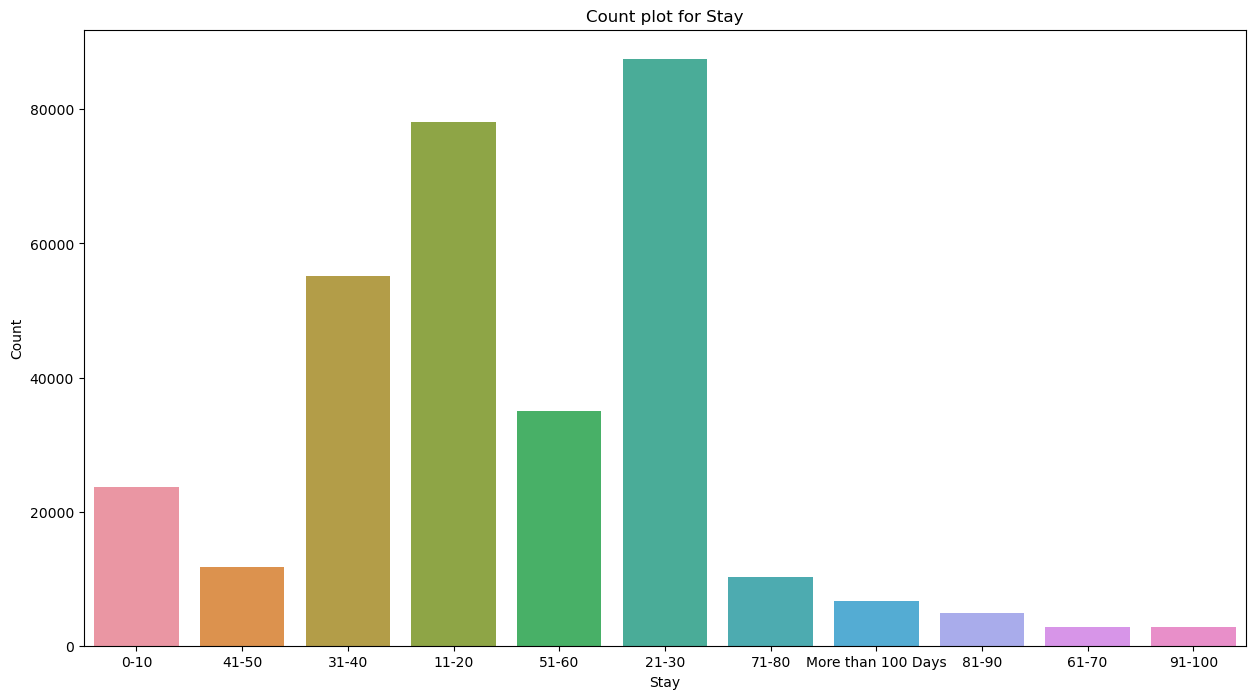

In [12]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x="Stay", data=data)
ax.set_title("Count plot for Stay")
ax.set_xlabel("Stay")
ax.set_ylabel("Count")
plt.show()

In [13]:
columns=['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission','Severity of Illness']

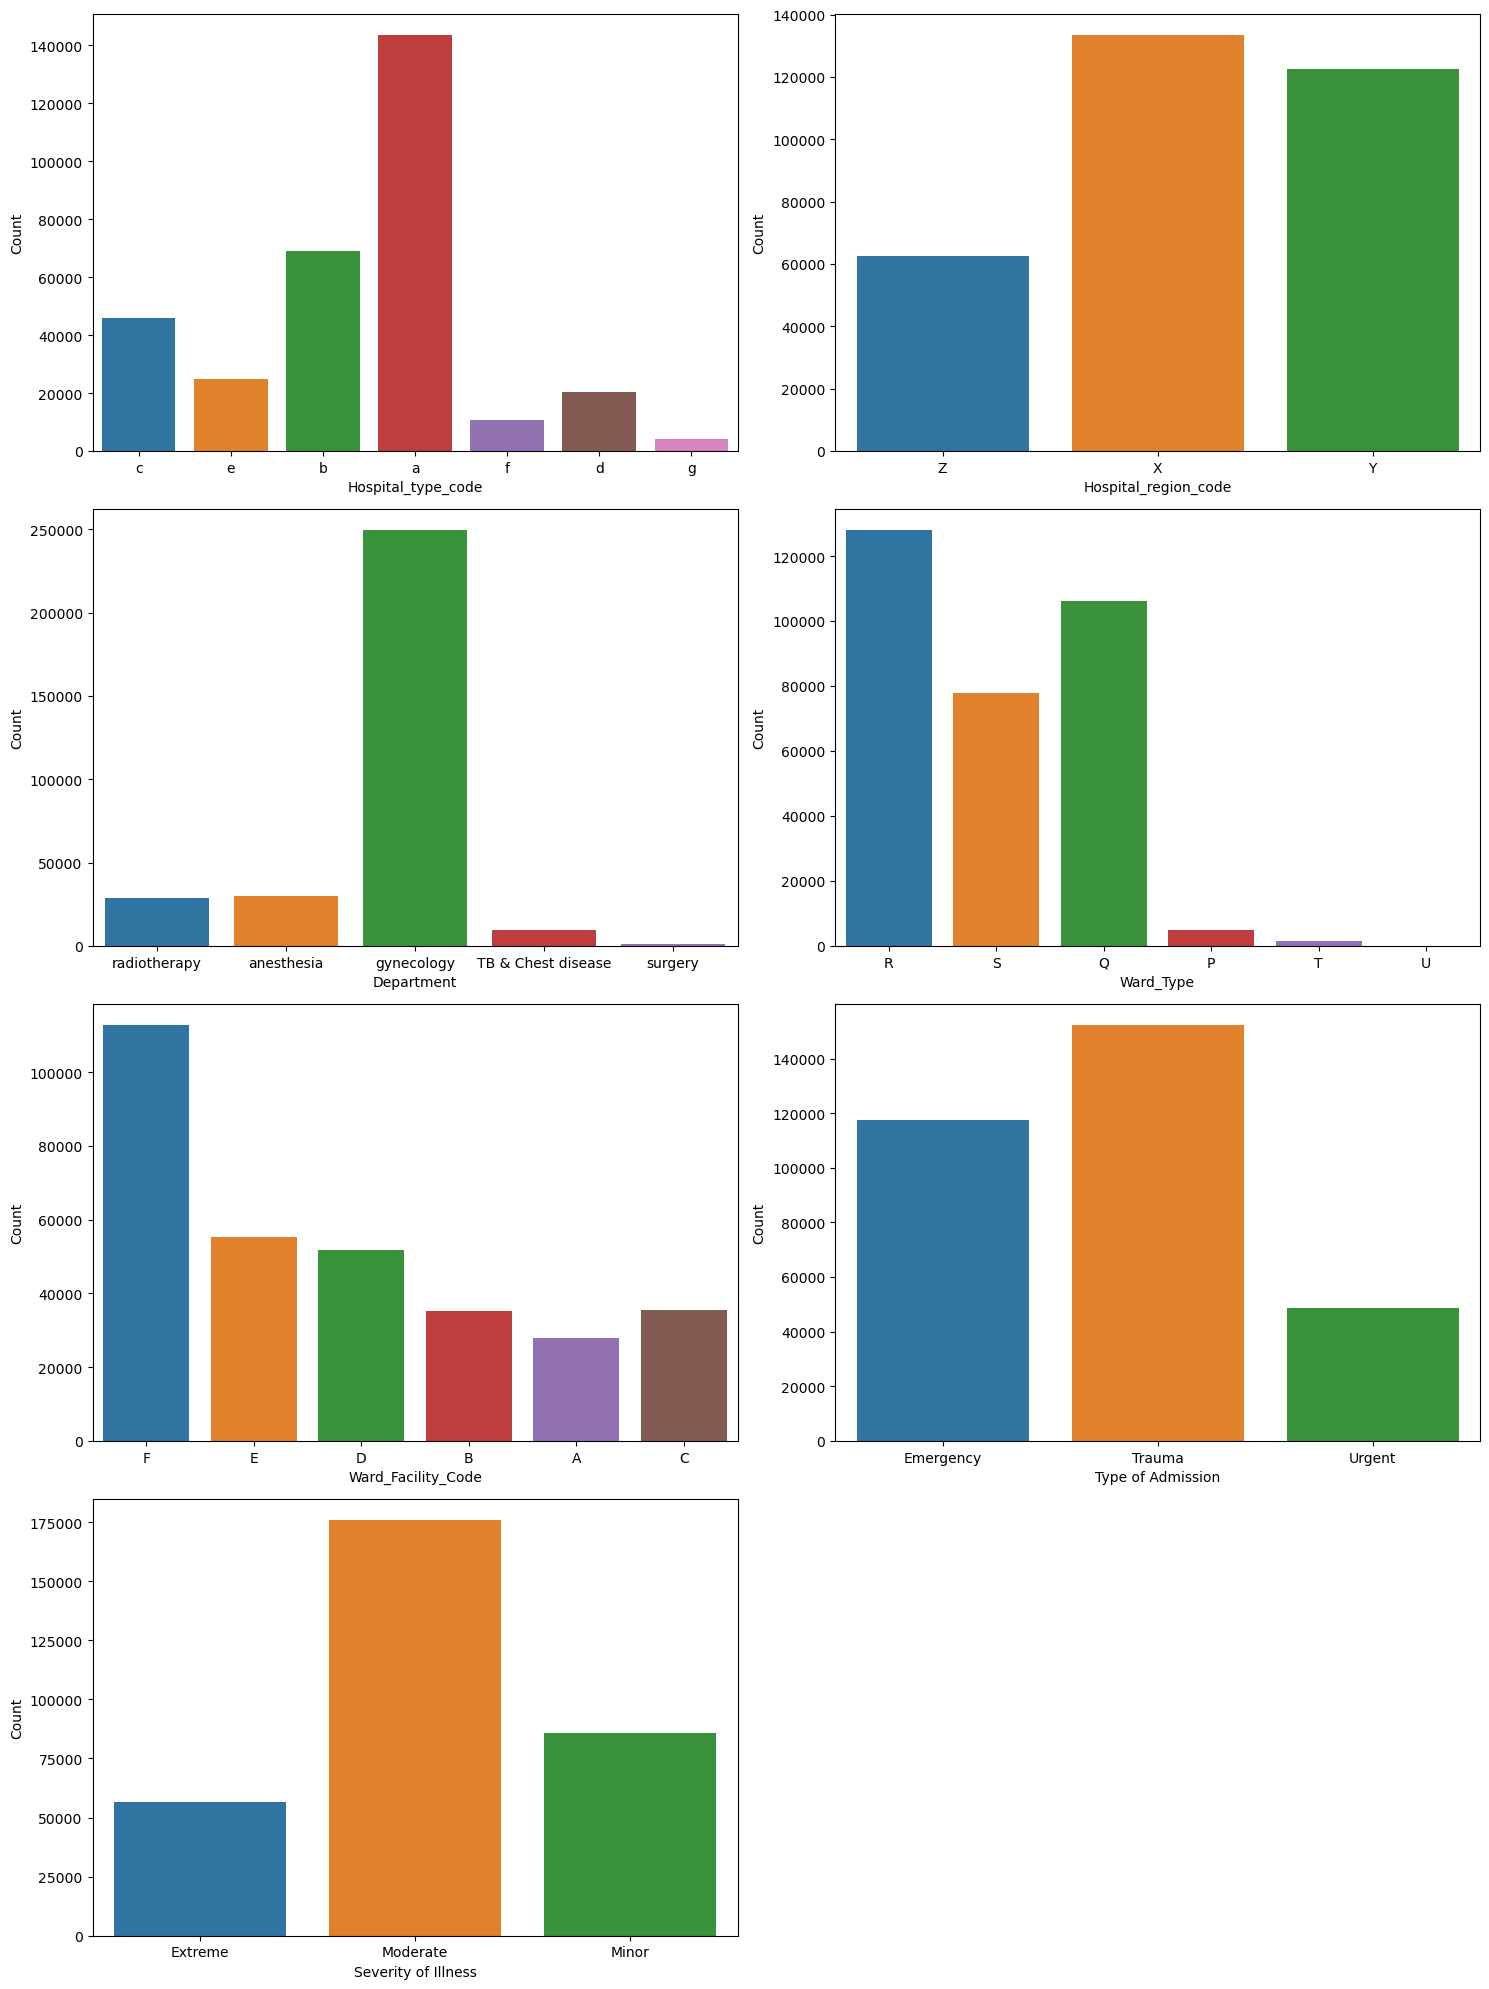

In [14]:
plt.figure(figsize=(15, 20))

for i, feature in enumerate(columns):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=feature, data=data)
    plt.ylabel("Count")


plt.tight_layout()

In [15]:
data['City_Code_Hospital'].value_counts()

1     55351
2     51809
6     46991
7     35463
3     31569
5     31105
9     26277
11    17137
4     13857
10     5249
13     3630
Name: City_Code_Hospital, dtype: int64

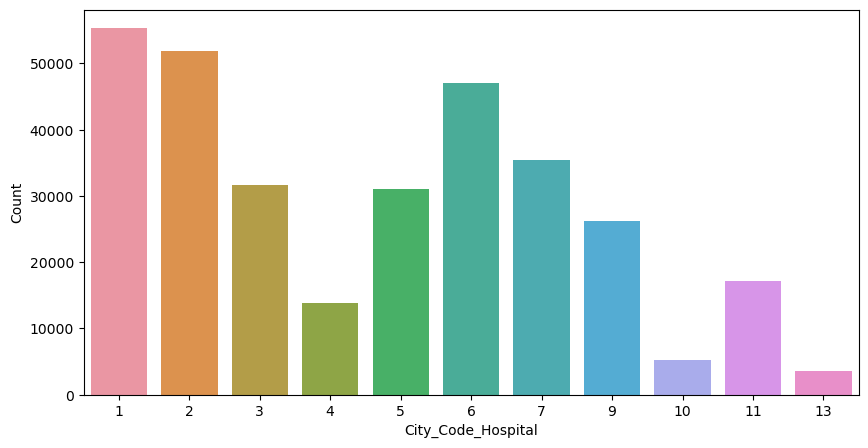

In [16]:

plt.figure(figsize=(10,5))

ax = sns.countplot(x="City_Code_Hospital", data=data)
ax.set_xlabel("City_Code_Hospital")
ax.set_ylabel("Count")
plt.show()

In [17]:
data['Available Extra Rooms in Hospital'].value_counts()

2     98311
4     91709
3     91520
5     19288
6      7786
1      5582
7      2876
8      1027
9       218
10       67
11       17
0        15
12       13
21        3
20        2
13        2
14        1
24        1
Name: Available Extra Rooms in Hospital, dtype: int64

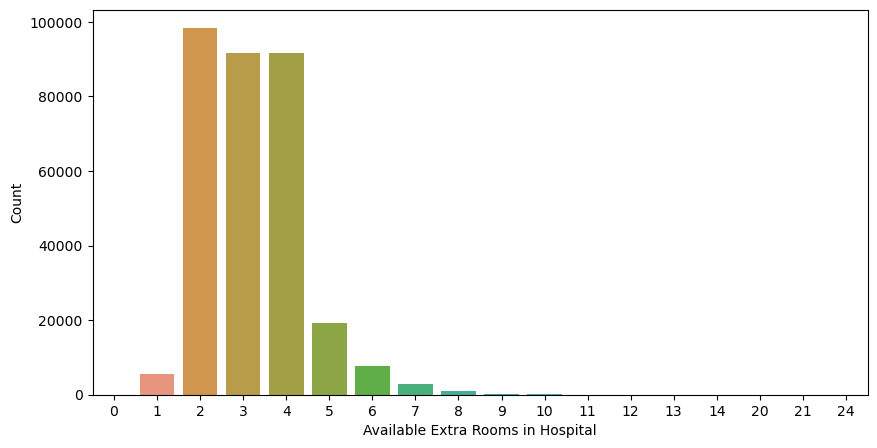

In [18]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x="Available Extra Rooms in Hospital", data=data)
ax.set_xlabel("Available Extra Rooms in Hospital")
ax.set_ylabel("Count")
plt.show()

In [19]:
data['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

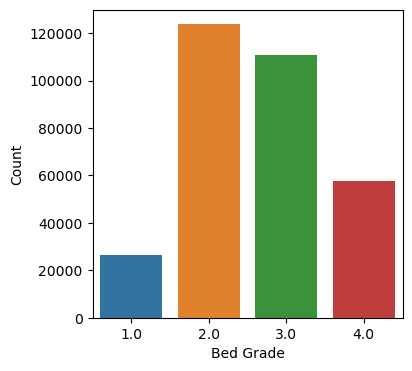

In [20]:
plt.figure(figsize=(4,4))

ax = sns.countplot(x="Bed Grade", data=data)
ax.set_xlabel("Bed Grade")
ax.set_ylabel("Count")
plt.show()

In [21]:
data['patientid'].value_counts()

66714     50
91292     43
38525     39
101359    36
33491     34
          ..
2449       1
61151      1
82611      1
129412     1
21641      1
Name: patientid, Length: 92017, dtype: int64

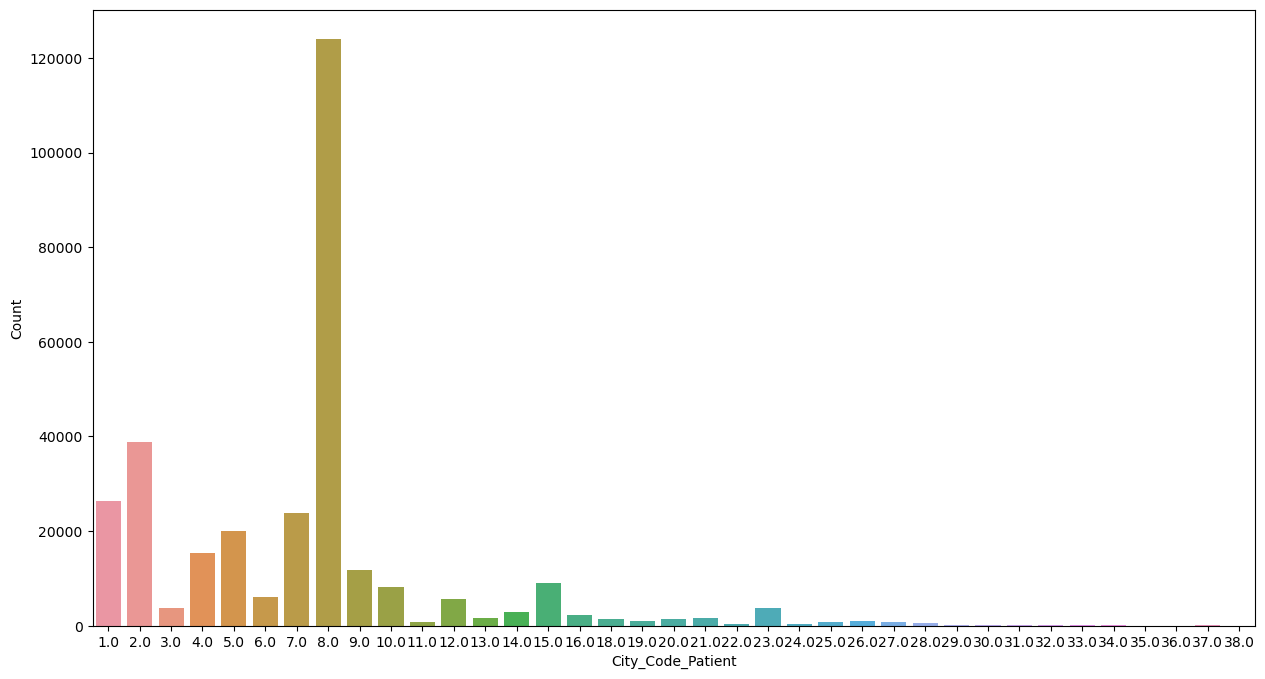

In [22]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x="City_Code_Patient", data=data)
ax.set_xlabel("City_Code_Patient")
ax.set_ylabel("Count")
plt.show()

In [23]:
data['Visitors with Patient'].value_counts()

2     138417
4      79225
3      59180
6      18860
5       9219
8       4872
7       2504
9       1358
1       1207
10      1183
12       968
11       327
16       286
14       207
15       194
13       106
24        78
20        62
18        61
0         22
17        20
22        19
19        12
25        12
21        11
23        10
32         9
30         9
Name: Visitors with Patient, dtype: int64

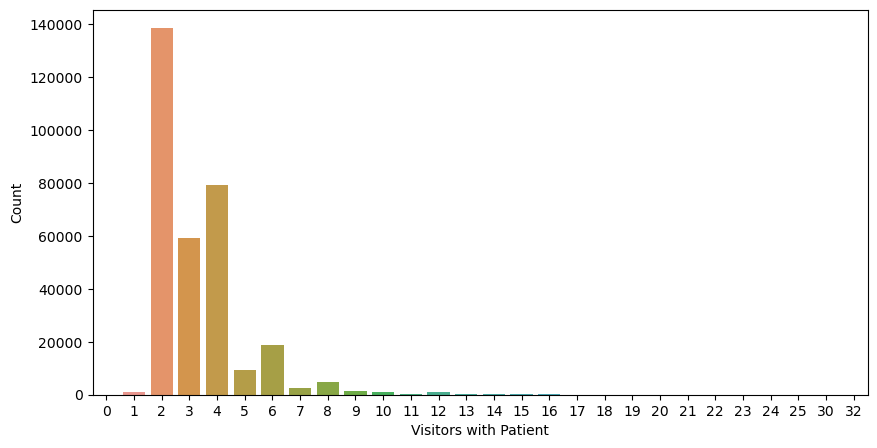

In [24]:
plt.figure(figsize=(10,5))

ax = sns.countplot(x="Visitors with Patient", data=data)
ax.set_xlabel("Visitors with Patient")
ax.set_ylabel("Count")
plt.show()

In [25]:
data.Age.value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

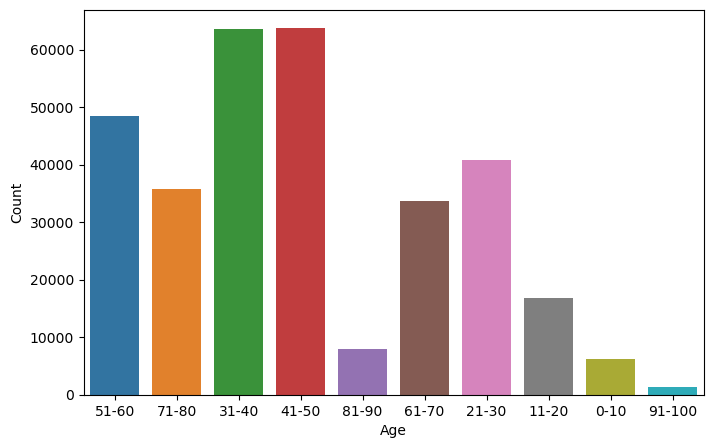

In [26]:
plt.figure(figsize=(8,5))

ax = sns.countplot(x="Age", data=data)
ax.set_xlabel("Age")
ax.set_ylabel("Count")
plt.show()

In [27]:
data.Admission_Deposit.value_counts()

4469.0    390
4277.0    377
4624.0    350
4789.0    302
4970.0    286
         ... 
9069.0      1
2390.0      1
8752.0      1
8000.0      1
2349.0      1
Name: Admission_Deposit, Length: 7300, dtype: int64

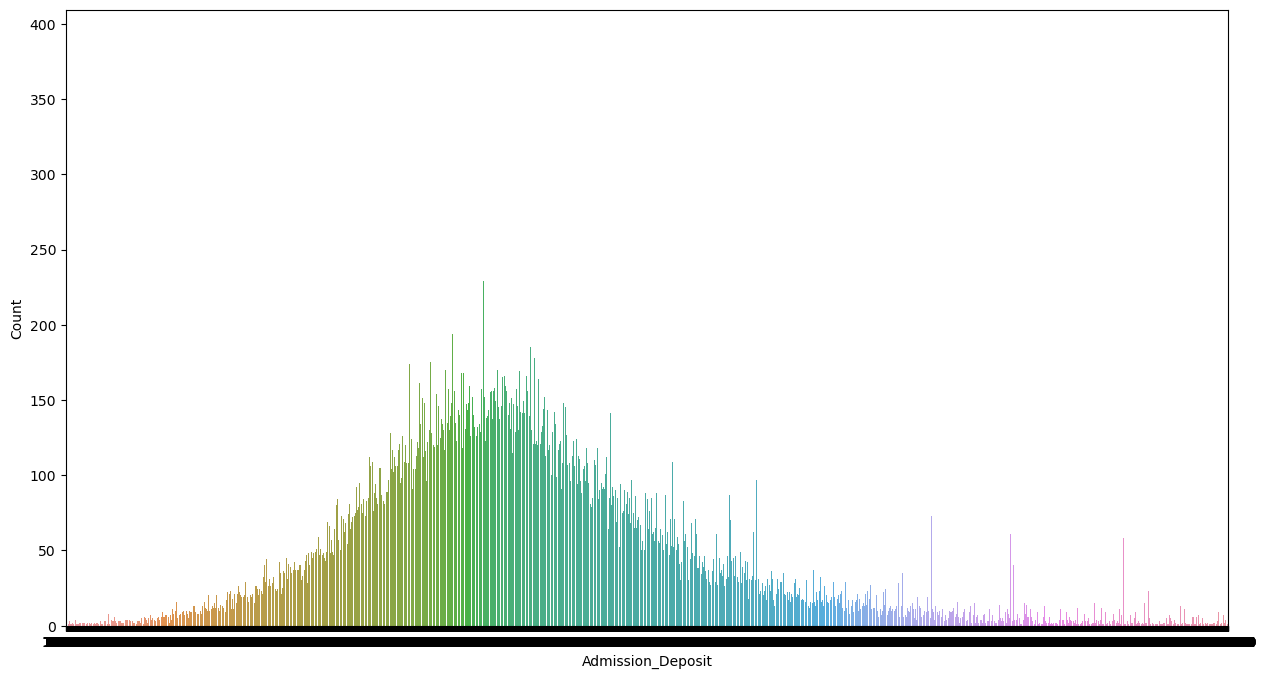

In [28]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x="Admission_Deposit", data=data)
ax.set_xlabel("Admission_Deposit")
ax.set_ylabel("Count")
plt.show()

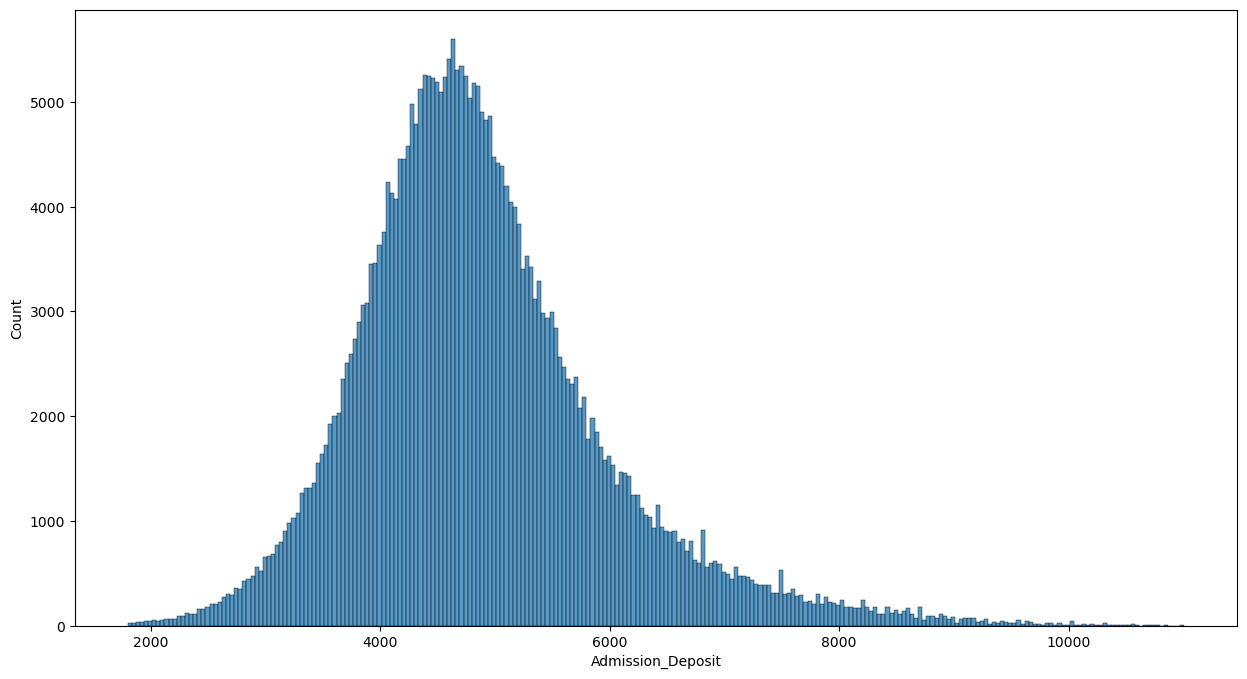

In [29]:
plt.figure(figsize=(15, 8))

ax = sns.histplot(data=data, x="Admission_Deposit")
ax.set_xlabel("Admission_Deposit")
ax.set_ylabel("Count")
plt.show()

###### Bivariate Analysis

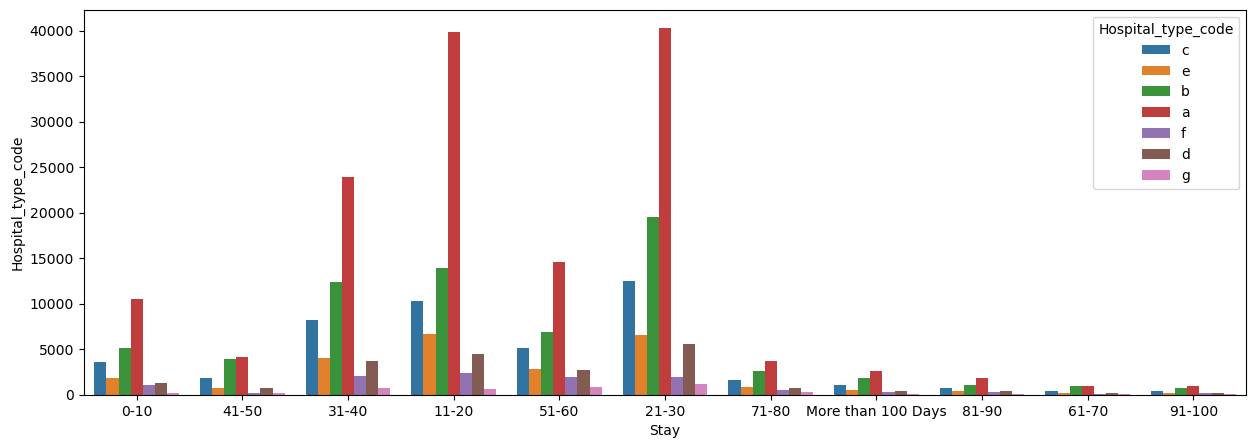

In [30]:
plt.figure(figsize=(15,5))

ax = sns.countplot(x="Stay", data=data, hue='Hospital_type_code')
ax.set_xlabel("Stay")
ax.set_ylabel("Hospital_type_code")
plt.show()

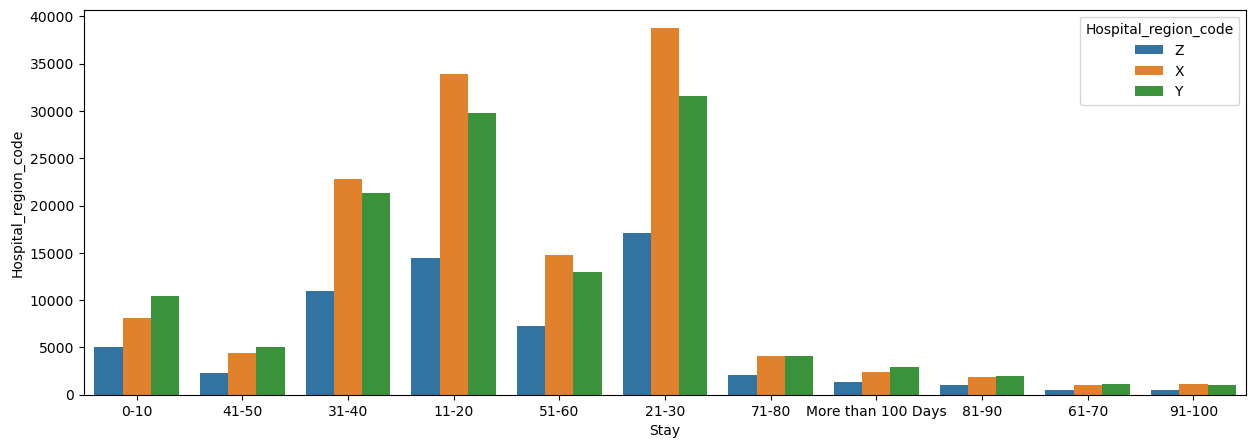

In [31]:
plt.figure(figsize=(15,5))

ax = sns.countplot(x="Stay", data=data, hue='Hospital_region_code')
ax.set_xlabel("Stay")
ax.set_ylabel("Hospital_region_code")
plt.show()

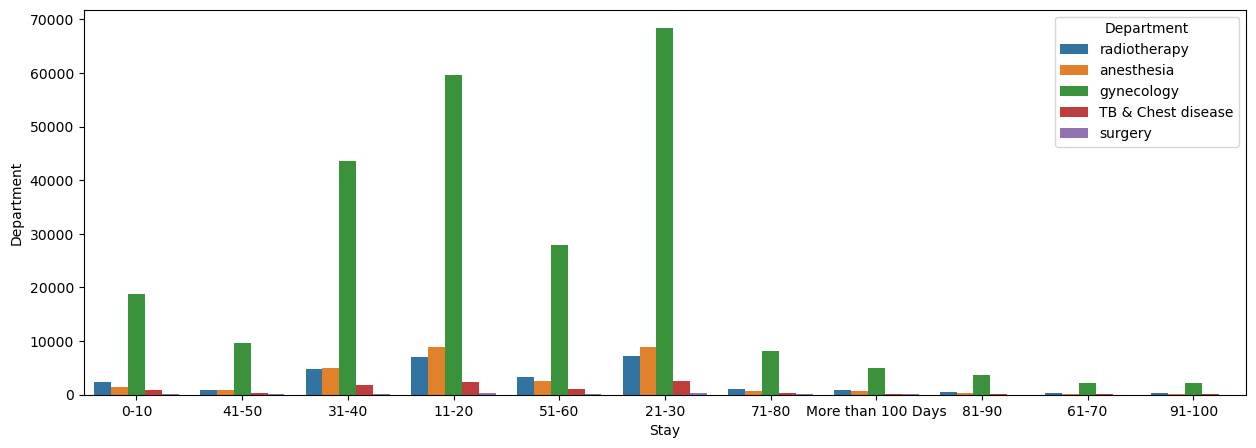

In [32]:
plt.figure(figsize=(15,5))

ax = sns.countplot(x="Stay", data=data, hue='Department')
ax.set_xlabel("Stay")
ax.set_ylabel("Department")
plt.show()

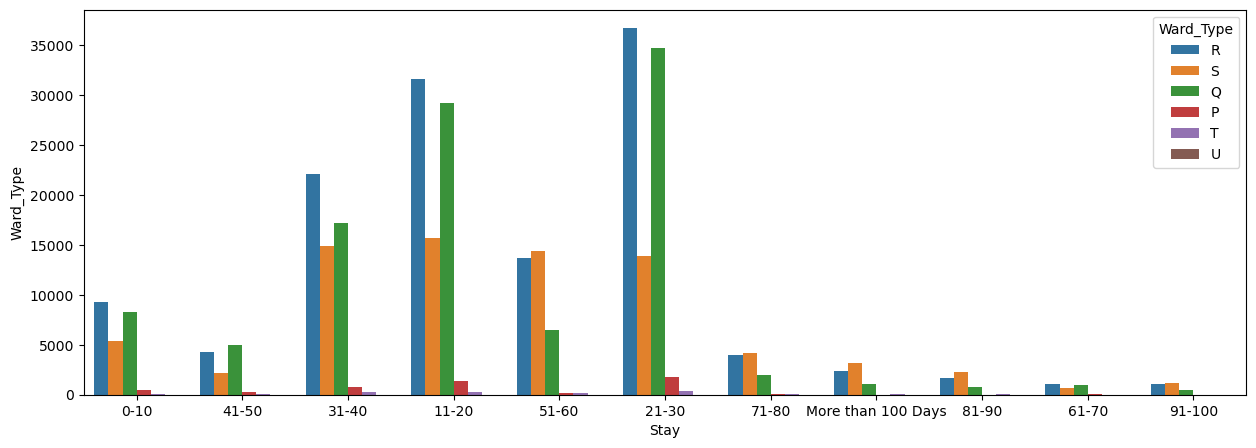

In [33]:
plt.figure(figsize=(15,5))

ax = sns.countplot(x="Stay", data=data, hue='Ward_Type')
ax.set_xlabel("Stay")
ax.set_ylabel("Ward_Type")
plt.show()

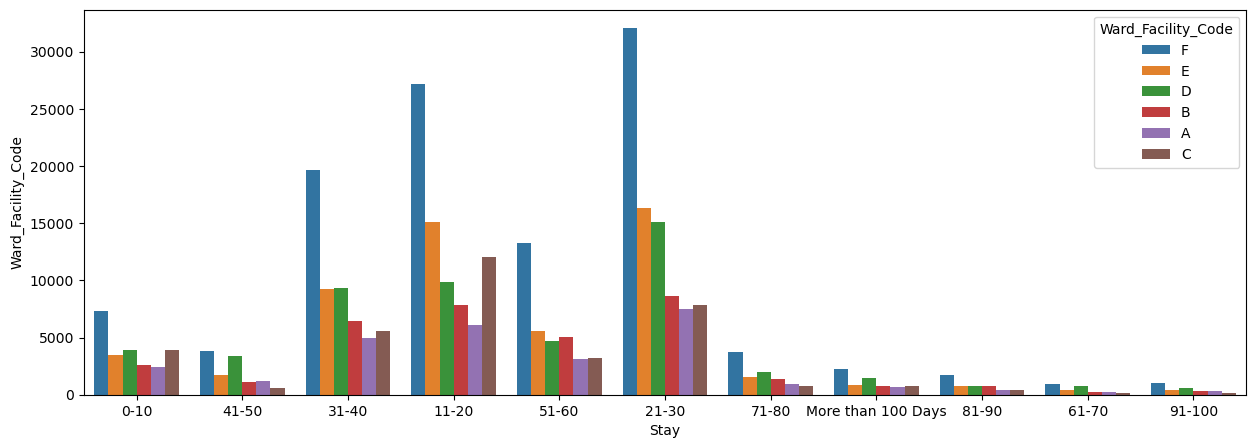

In [34]:
plt.figure(figsize=(15,5))

ax = sns.countplot(x="Stay", data=data, hue='Ward_Facility_Code')
ax.set_xlabel("Stay")
ax.set_ylabel("Ward_Facility_Code")
plt.show()

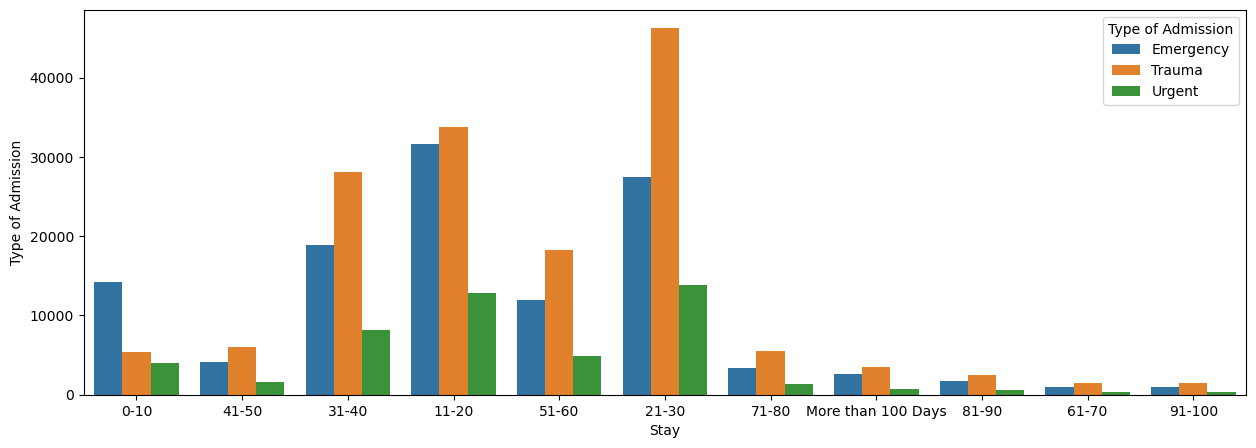

In [35]:
plt.figure(figsize=(15,5))

ax = sns.countplot(x="Stay", data=data, hue='Type of Admission')
ax.set_xlabel("Stay")
ax.set_ylabel("Type of Admission")
plt.show()

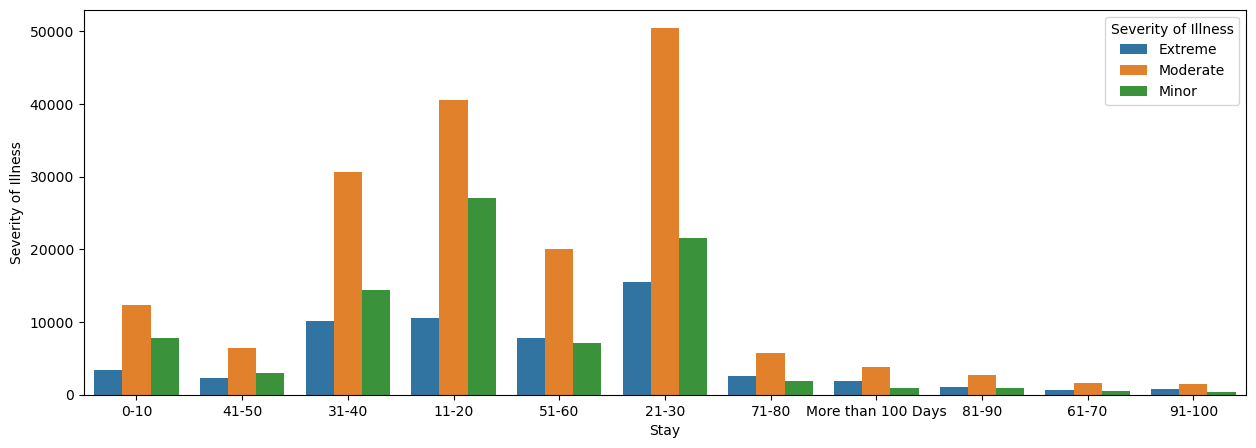

In [36]:
plt.figure(figsize=(15,5))

ax = sns.countplot(x="Stay", data=data, hue='Severity of Illness')
ax.set_xlabel("Stay")
ax.set_ylabel("Severity of Illness")
plt.show()

###### Multi-Variate Analysis

In [37]:
data.corr().T

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
case_id,1.000000,-0.043023,-0.011352,0.042580,0.013702,-0.004150,0.065196,0.001309,-0.045972
Hospital_code,-0.043023,1.000000,0.128294,-0.059638,-0.013739,0.002291,-0.015530,-0.028500,0.045446
City_Code_Hospital,-0.011352,0.128294,1.000000,-0.045771,-0.049309,0.000750,-0.023988,0.018184,-0.034455
Available Extra Rooms in Hospital,0.042580,-0.059638,-0.045771,1.000000,-0.115868,0.000921,-0.009681,0.096714,-0.143739
Bed Grade,0.013702,-0.013739,-0.049309,-0.115868,1.000000,0.001645,-0.008105,0.088945,0.073833
patientid,-0.004150,0.002291,0.000750,0.000921,0.001645,1.000000,0.002002,0.006889,-0.000877
City_Code_Patient,0.065196,-0.015530,-0.023988,-0.009681,-0.008105,0.002002,1.000000,-0.012074,0.025837
Visitors with Patient,0.001309,-0.028500,0.018184,0.096714,0.088945,0.006889,-0.012074,1.000000,-0.150358
Admission_Deposit,-0.045972,0.045446,-0.034455,-0.143739,0.073833,-0.000877,0.025837,-0.150358,1.000000


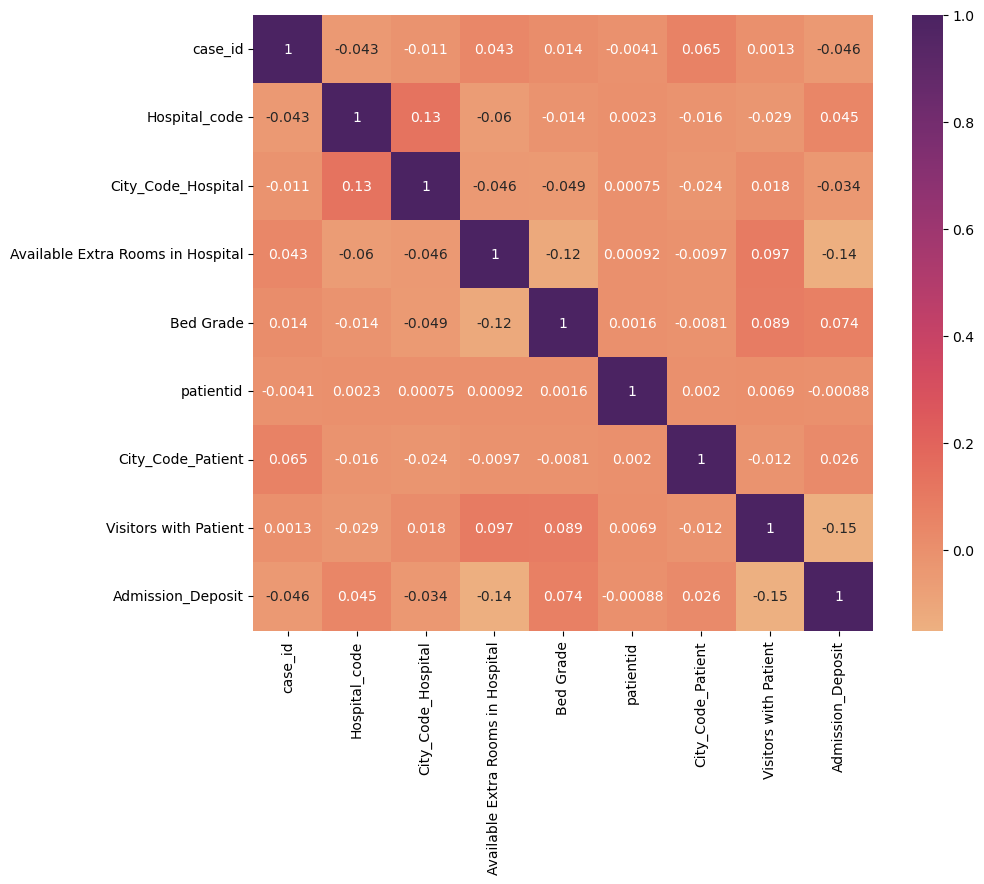

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='flare');

### 6.Pre-Processing

##### Handling Missing values

In [39]:
missing_percentage = data.isnull().sum() / len(data) * 100

In [40]:
missing_percentage

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available Extra Rooms in Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed Grade                            0.035486
patientid                            0.000000
City_Code_Patient                    1.423197
Type of Admission                    0.000000
Severity of Illness                  0.000000
Visitors with Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
Stay                                 0.000000
dtype: float64

In [2]:
import sweetviz as sv

report = sv.analyze(data)
# Display the report
report.show_html()

NameError: name 'data' is not defined

In [42]:
missing_rows_bed_grade= data[data['Bed Grade'].isnull()]
missing_rows_bed_grade

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
293,294,6,a,6,X,4,gynecology,Q,F,NaN,27075,15.0,Trauma,Extreme,2,21-30,4420.0,31-40
1071,1072,6,a,6,X,2,gynecology,Q,F,NaN,62491,8.0,Trauma,Extreme,4,61-70,5395.0,21-30
20379,20380,6,a,6,X,4,gynecology,Q,F,NaN,69932,2.0,Trauma,Extreme,3,41-50,5989.0,31-40
23791,23792,6,a,6,X,3,gynecology,R,F,NaN,29943,10.0,Emergency,Minor,3,31-40,4488.0,41-50
25162,25163,6,a,6,X,5,gynecology,R,F,NaN,92499,1.0,Emergency,Minor,2,71-80,4885.0,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234337,234338,6,a,6,X,2,radiotherapy,R,F,NaN,22881,7.0,Emergency,Minor,2,11-20,2416.0,0-10
234577,234578,6,a,6,X,2,gynecology,R,F,NaN,120677,2.0,Trauma,Extreme,4,41-50,4932.0,51-60
234895,234896,6,a,6,X,2,gynecology,R,F,NaN,111514,1.0,Trauma,Moderate,4,51-60,3984.0,11-20
235048,235049,6,a,6,X,2,gynecology,R,F,NaN,57706,2.0,Trauma,Moderate,3,41-50,4139.0,51-60


In [43]:
data['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

In [46]:
data['Bed Grade'].fillna(data['Bed Grade'].mode()[0], inplace=True)

In [47]:
data['Bed Grade'].value_counts()

2.0    123784
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

In [48]:
data['City_Code_Patient'].value_counts()

8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

In [49]:
missing_rows_City_Code_Patient= data[data['City_Code_Patient'].isnull()]
missing_rows_City_Code_Patient

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
191,192,14,a,1,X,2,radiotherapy,Q,E,3.0,122110,NaN,Emergency,Minor,2,71-80,9096.0,51-60
192,193,30,c,3,Z,2,anesthesia,Q,A,4.0,122110,NaN,Trauma,Minor,2,71-80,5098.0,31-40
193,194,27,a,7,Y,2,radiotherapy,P,C,3.0,122110,NaN,Trauma,Minor,2,71-80,7776.0,21-30
194,195,27,a,7,Y,2,anesthesia,Q,C,3.0,122110,NaN,Trauma,Minor,2,71-80,5988.0,11-20
195,196,25,e,1,X,3,radiotherapy,S,E,3.0,122110,NaN,Urgent,Minor,2,71-80,5333.0,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318198,318199,23,a,6,X,2,anesthesia,Q,F,3.0,58469,NaN,Urgent,Minor,2,11-20,4432.0,11-20
318263,318264,28,b,11,X,3,anesthesia,R,F,3.0,66803,NaN,Trauma,Moderate,2,31-40,5415.0,11-20
318269,318270,26,b,2,Y,3,gynecology,R,D,4.0,95483,NaN,Trauma,Minor,5,51-60,4135.0,51-60
318271,318272,28,b,11,X,2,gynecology,R,F,4.0,117128,NaN,Emergency,Minor,2,61-70,3418.0,0-10


In [50]:
data['City_Code_Patient'].fillna(data['City_Code_Patient'].median(), inplace=True)

In [51]:
data['City_Code_Patient'].value_counts()

8.0     128543
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

##### Handling Duplicates

In [52]:
data.duplicated().sum()

0

In [53]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [54]:
data['Severity of Illness'].unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [55]:
data['Type of Admission'].unique()

array(['Emergency', 'Trauma', 'Urgent'], dtype=object)

##### Ordinal Encoding

In [56]:
custom_mapping = {'Minor': 1, 'Moderate': 2, 'Extreme': 3}
data['Severity of Illness'] = data['Severity of Illness'].map(custom_mapping)

In [57]:
cus_map = {'Urgent': 1, 'Trauma': 2, 'Emergency': 3}
data['Type of Admission'] = data['Type of Admission'].map(cus_map)

In [58]:
cat_columns = ["Hospital_type_code","Hospital_region_code","Department","Ward_Type","Ward_Facility_Code","Type of Admission","Age","Stay"]

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [60]:
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,1,3,2,5,4911.0,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,2,3,2,5,5954.0,4
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,2,3,2,5,4745.0,3
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,2,3,2,5,7272.0,4
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,2,3,2,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,0,3,3,1,5,4.0,86499,23.0,1,2,3,4,4144.0,1
318434,318435,24,0,1,0,2,1,1,4,4.0,325,8.0,0,2,4,8,6699.0,3
318435,318436,7,0,4,0,3,2,2,5,4.0,125235,10.0,1,1,3,7,4235.0,1
318436,318437,11,1,2,1,3,1,1,3,3.0,91081,8.0,2,1,5,1,3761.0,1


In [61]:
con_col = data[["Available Extra Rooms in Hospital","Visitors with Patient","Admission_Deposit"]]

##### Handling Outliers for Con_columns

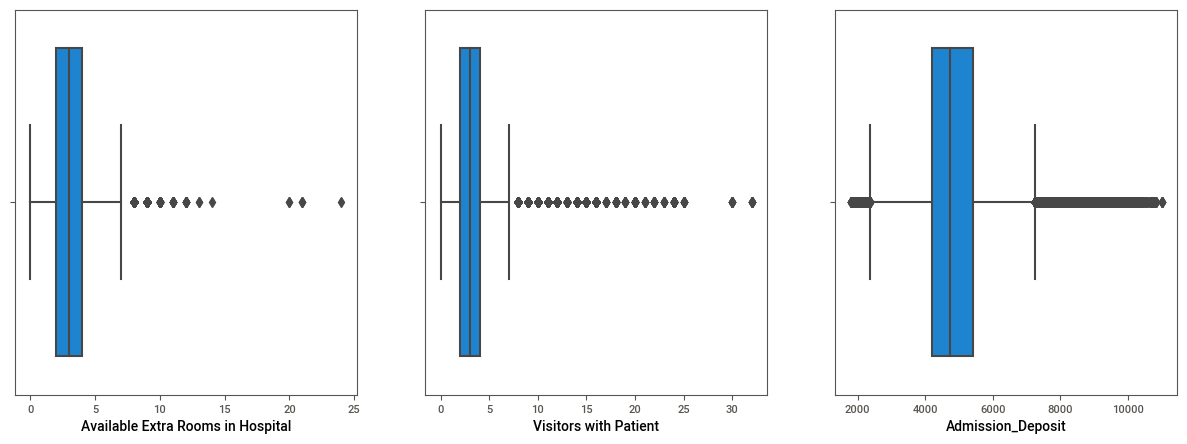

In [62]:
plt.figure(figsize=(15, 5))
plotnumber = 1
for column in con_col:
    plt.subplot(1, 3, plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column)
    plotnumber += 1
plt.show()


##### Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(con_col)
scaled_data = pd.DataFrame(scaled_data, columns = ["Available_Extra_Rooms_in_Hospital","Visitors_with_Patient","Admission_Deposit"], index=data.index)

In [64]:
data.drop(columns=["Available Extra Rooms in Hospital","Visitors with Patient","Admission_Deposit"],inplace=True)

In [65]:
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay
0,1,8,2,3,2,3,2,5,2.0,31397,7.0,1,3,5,0
1,2,2,2,5,2,3,3,5,2.0,31397,7.0,2,3,5,4
2,3,10,4,1,0,1,3,4,2.0,31397,7.0,2,3,5,3
3,4,26,1,2,1,3,2,3,2.0,31397,7.0,2,3,5,4
4,5,26,1,2,1,3,3,3,2.0,31397,7.0,2,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,0,3,1,5,4.0,86499,23.0,1,2,4,1
318434,318435,24,0,1,0,1,1,4,4.0,325,8.0,0,2,8,3
318435,318436,7,0,4,0,2,2,5,4.0,125235,10.0,1,1,7,1
318436,318437,11,1,2,1,1,1,3,3.0,91081,8.0,2,1,1,1


In [66]:
scaled_data

,Available_Extra_Rooms_in_Hospital,Visitors_with_Patient,Admission_Deposit
0,-0.169177,-0.727923,0.027835
1,-1.025217,-0.727923,0.987556
2,-1.025217,-0.727923,-0.124910
3,-1.025217,-0.727923,2.200319
4,-1.025217,-0.727923,0.623175
...,...,...,...
318433,-0.169177,-0.161049,-0.677923
318434,-1.025217,0.405826,1.673071
318435,-0.169177,-0.161049,-0.594189
318436,-0.169177,0.972701,-1.030342


In [67]:
data = pd.concat([data,scaled_data], axis=1)


In [68]:
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay,Available_Extra_Rooms_in_Hospital,Visitors_with_Patient,Admission_Deposit
0,1,8,2,3,2,3,2,5,2.0,31397,7.0,1,3,5,0,-0.169177,-0.727923,0.027835
1,2,2,2,5,2,3,3,5,2.0,31397,7.0,2,3,5,4,-1.025217,-0.727923,0.987556
2,3,10,4,1,0,1,3,4,2.0,31397,7.0,2,3,5,3,-1.025217,-0.727923,-0.124910
3,4,26,1,2,1,3,2,3,2.0,31397,7.0,2,3,5,4,-1.025217,-0.727923,2.200319
4,5,26,1,2,1,3,3,3,2.0,31397,7.0,2,3,5,4,-1.025217,-0.727923,0.623175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,0,3,1,5,4.0,86499,23.0,1,2,4,1,-0.169177,-0.161049,-0.677923
318434,318435,24,0,1,0,1,1,4,4.0,325,8.0,0,2,8,3,-1.025217,0.405826,1.673071
318435,318436,7,0,4,0,2,2,5,4.0,125235,10.0,1,1,7,1,-0.169177,-0.161049,-0.594189
318436,318437,11,1,2,1,1,1,3,3.0,91081,8.0,2,1,1,1,-0.169177,0.972701,-1.030342


### 7.Features Selection

-  Selecting the required features to predict the model

In [69]:
data.drop(['patientid','case_id'],axis=1, inplace= True)

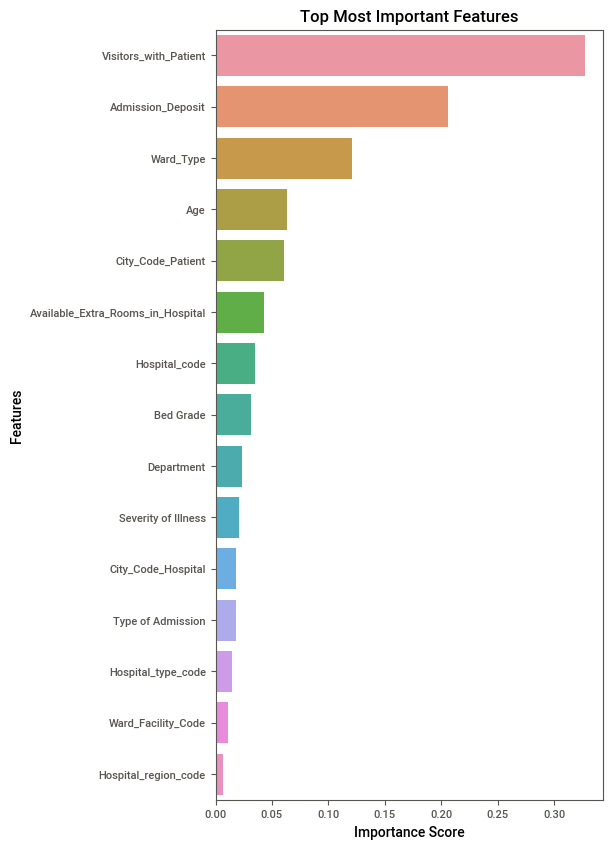

In [70]:
from sklearn.ensemble import RandomForestRegressor
x=data.drop('Stay',axis=1)
y=data['Stay']
# Train your Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x, y)

importances = rf_model.feature_importances_

# Create a dataframe of feature importances
feat_imp = pd.DataFrame({'feature': x.columns, 'importance': importances})

# Sort the dataframe by feature importance score
feat_imp = feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(5,10))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title('Top Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

##### Declaring target and independent features

In [71]:
x = data.drop(['Stay'], axis=1) #independent  columns
y = data['Stay'] #target column 

In [72]:
x.shape

(318438, 15)

##### Applying Smote

In [73]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x,y)

In [74]:
x_train_smote.shape

(962401, 15)

In [75]:
y_train_smote.shape

(962401,)

In [77]:
from collections import Counter
print('actual',Counter(y))
print('smote',Counter(y_train_smote))

actual Counter({2: 87491, 1: 78139, 3: 55159, 5: 35018, 0: 23604, 4: 11743, 7: 10254, 10: 6683, 8: 4838, 9: 2765, 6: 2744})
smote Counter({0: 87491, 4: 87491, 3: 87491, 1: 87491, 5: 87491, 2: 87491, 7: 87491, 10: 87491, 8: 87491, 6: 87491, 9: 87491})


##### Splitting

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train_smote, y_train_smote, test_size=0.30, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(673680, 15)
(288721, 15)
(673680,)
(288721,)


### 8.Modelling

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,roc_curve,precision_score,recall_score,f1_score,confusion_matrix


##### DECISION TREE CLASSIFIER

In [84]:
#instantiating the model
tree=DecisionTreeClassifier()

#training the model
tree.fit(x_train,y_train)

#predicting
y_test_pred_tree= tree.predict(x_test)

print('Testing_Score -',accuracy_score(y_test,y_test_pred_tree))
tree_test_acc = accuracy_score(y_test,y_test_pred_tree)

print('classificationreport-\n',classification_report(y_test, y_test_pred_tree))



# Predicting on training set
y_train_pred_tree= tree.predict(x_train)
train_accuracy_tree= accuracy_score(y_train, y_train_pred_tree)
print('Training_Score:', train_accuracy_tree)
tree_train_acc = accuracy_score(y_train, y_train_pred_tree)

Testing_Score - 0.60317053487623
classificationreport-
               precision    recall  f1-score   support

           0       0.57      0.56      0.56     26218
           1       0.34      0.32      0.33     26340
           2       0.36      0.34      0.35     26429
           3       0.32      0.30      0.31     26369
           4       0.59      0.61      0.60     26115
           5       0.47      0.46      0.46     26022
           6       0.79      0.84      0.81     26352
           7       0.66      0.67      0.66     26122
           8       0.82      0.84      0.83     26262
           9       0.83      0.87      0.85     26227
          10       0.81      0.82      0.81     26265

    accuracy                           0.60    288721
   macro avg       0.60      0.60      0.60    288721
weighted avg       0.60      0.60      0.60    288721

Training_Score: 0.9999035150219688


##### RANDOM FOREST CLASSIFIER

In [85]:
#instantiating the model
rf = RandomForestClassifier()

#training the model
rf.fit(x_train,y_train)

#predicting
y_test_pred_rf= rf.predict(x_test)

print('Testing_Score -',accuracy_score(y_test,y_test_pred_rf))
rf_test_acc = accuracy_score(y_test,y_test_pred_rf)

print('classificationreport-\n',classification_report(y_test, y_test_pred_rf))



# Predicting on training set
y_train_pred_rf= rf.predict(x_train)
train_accuracy_rf= accuracy_score(y_train, y_train_pred_rf)
print('Training_score:', train_accuracy_rf)
rf_train_acc = accuracy_score(y_train, y_train_pred_rf)

Testing_Score - 0.7362159316433512
classificationreport-
               precision    recall  f1-score   support

           0       0.68      0.77      0.72     26218
           1       0.43      0.42      0.43     26340
           2       0.43      0.46      0.44     26429
           3       0.54      0.38      0.44     26369
           4       0.77      0.79      0.78     26115
           5       0.68      0.64      0.66     26022
           6       0.91      0.95      0.93     26352
           7       0.83      0.84      0.84     26122
           8       0.90      0.96      0.93     26262
           9       0.93      0.96      0.95     26227
          10       0.92      0.93      0.93     26265

    accuracy                           0.74    288721
   macro avg       0.73      0.74      0.73    288721
weighted avg       0.73      0.74      0.73    288721

Training_score: 0.9998975774848593


###### ADA BOOST CLASSIFIER

In [86]:
#instantiating the model
ada_boost= AdaBoostClassifier()
#fitting the model
ada_boost.fit(x_train, y_train)


#predicting
y_test_pred_adb= ada_boost.predict(x_test)

print('Testing_Score -',accuracy_score(y_test,y_test_pred_adb))
adb_test_acc = accuracy_score(y_test,y_test_pred_adb)

print('classificationreport-\n',classification_report(y_test, y_test_pred_adb))



# Predicting on training set
y_train_pred_adb= ada_boost.predict(x_train)
train_accuracy_adb= accuracy_score(y_train, y_train_pred_adb)
print('Training_Score:', train_accuracy_adb)
adb_train_acc = accuracy_score(y_train, y_train_pred_adb)

Testing_Score - 0.2740361802570648
classificationreport-
               precision    recall  f1-score   support

           0       0.26      0.59      0.36     26218
           1       0.33      0.23      0.27     26340
           2       0.37      0.18      0.24     26429
           3       0.18      0.18      0.18     26369
           4       0.26      0.17      0.21     26115
           5       0.26      0.27      0.27     26022
           6       0.29      0.28      0.29     26352
           7       0.22      0.19      0.21     26122
           8       0.28      0.47      0.35     26262
           9       0.29      0.21      0.24     26227
          10       0.39      0.24      0.30     26265

    accuracy                           0.27    288721
   macro avg       0.29      0.27      0.26    288721
weighted avg       0.29      0.27      0.26    288721

Training_Score: 0.273618038237739


##### XG BOOST CLASSIFIER

In [87]:
#instantiating the model
xgb = XGBClassifier()
#fitting the model
xgb.fit(x_train, y_train)

#predicting
y_test_pred_xgb= xgb.predict(x_test)

print('Testing_Score -',accuracy_score(y_test,y_test_pred_xgb))
xgb_test_acc = accuracy_score(y_test,y_test_pred_xgb)

print('classificationreport-\n',classification_report(y_test, y_test_pred_xgb))



# Predicting on training set
y_train_pred_xgb= xgb.predict(x_train)
train_accuracy_xgb= accuracy_score(y_train, y_train_pred_xgb)
print('Training_Score:', train_accuracy_xgb)
xgb_train_acc = accuracy_score(y_train, y_train_pred_xgb)

Testing_Score - 0.49068477873102406
classificationreport-
               precision    recall  f1-score   support

           0       0.51      0.60      0.55     26218
           1       0.41      0.42      0.41     26340
           2       0.38      0.62      0.47     26429
           3       0.42      0.15      0.22     26369
           4       0.47      0.38      0.42     26115
           5       0.40      0.35      0.37     26022
           6       0.57      0.57      0.57     26352
           7       0.44      0.36      0.39     26122
           8       0.58      0.75      0.66     26262
           9       0.54      0.63      0.58     26227
          10       0.68      0.57      0.62     26265

    accuracy                           0.49    288721
   macro avg       0.49      0.49      0.48    288721
weighted avg       0.49      0.49      0.48    288721

Training_Score: 0.5127152357202233


##### KNN CLASSIFIER

In [88]:
#instantiating the model
knn = KNeighborsClassifier()
#fitting the model
knn.fit(x_train, y_train)

#predicting
y_test_pred_knn= knn.predict(x_test)

print('Testing_Score -',accuracy_score(y_test,y_test_pred_knn))
knn_test_acc = accuracy_score(y_test,y_test_pred_knn)

print('classificationreport-\n',classification_report(y_test, y_test_pred_knn))



# Predicting on training set
y_train_pred_knn= knn.predict(x_train)
train_accuracy_knn= accuracy_score(y_train, y_train_pred_knn)
print('Training_Score:', train_accuracy_knn)
knn_train_acc = accuracy_score(y_train, y_train_pred_knn)

Testing_Score - 0.6949407905902237
classificationreport-
               precision    recall  f1-score   support

           0       0.59      0.81      0.68     26218
           1       0.41      0.31      0.36     26340
           2       0.39      0.23      0.29     26429
           3       0.49      0.34      0.40     26369
           4       0.66      0.81      0.73     26115
           5       0.67      0.55      0.61     26022
           6       0.79      0.94      0.86     26352
           7       0.77      0.84      0.80     26122
           8       0.87      0.95      0.91     26262
           9       0.84      0.95      0.89     26227
          10       0.88      0.92      0.90     26265

    accuracy                           0.69    288721
   macro avg       0.67      0.70      0.67    288721
weighted avg       0.67      0.69      0.67    288721

Training_Score: 0.800823833273958


### 9.Model Comparision report

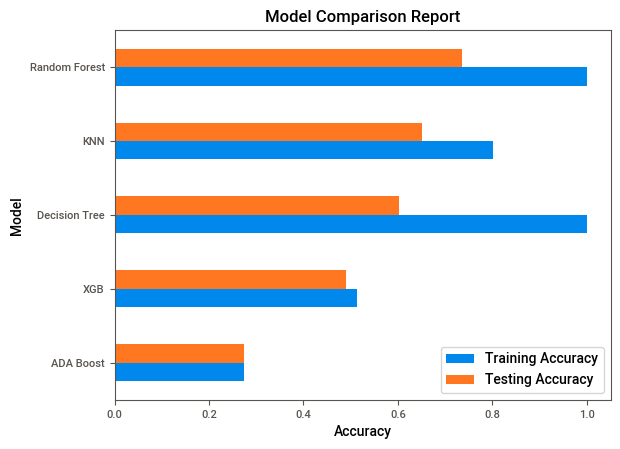

In [99]:

models = pd.DataFrame({
    'Training Accuracy': [train_accuracy_tree, train_accuracy_rf, train_accuracy_adb, train_accuracy_xgb, train_accuracy_knn],
    'Testing Accuracy': [tree_test_acc, rf_test_acc, adb_test_acc, xgb_test_acc, knn_test_acc]
}, index=['Decision Tree', 'Random Forest', 'ADA Boost', 'XGB', 'KNN']).sort_values(by='Testing Accuracy', ascending=True)

models.plot(kind='barh')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Comparison Report')
plt.legend(loc='lower right')
plt.show()


In [91]:
models = pd.DataFrame({
    'Accuracy': [tree_test_acc, rf_test_acc, adb_test_acc, xgb_test_acc, knn_test_acc]
}, index=['Decision Tree', 'Random Forest', 'ADA Boost', 'XGB', 'KNN']).sort_values(by='Accuracy', ascending=True)
models

,Accuracy
ADA Boost,0.274036
XGB,0.490685
Decision Tree,0.603171
KNN,0.694941
Random Forest,0.736216


In [92]:
models.Accuracy.sort_values(ascending=False)


Random Forest    0.736216
KNN              0.694941
Decision Tree    0.603171
XGB              0.490685
ADA Boost        0.274036
Name: Accuracy, dtype: float64

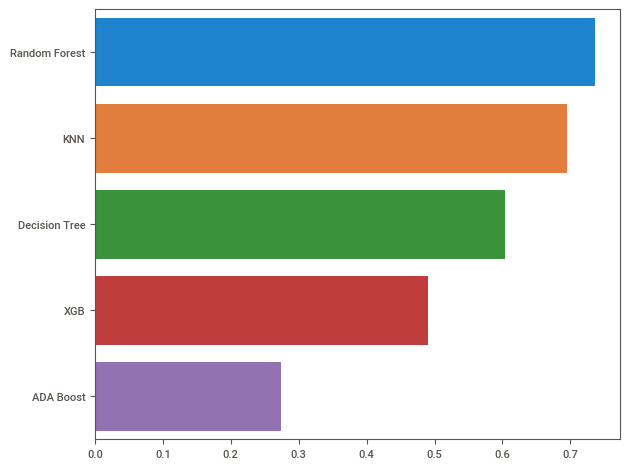

In [93]:
sns.barplot(x=models.Accuracy.sort_values(ascending=False).values,y= models.Accuracy.sort_values(ascending=False).index)
plt.tight_layout()

### 10.Hyperparameter Tuning

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Define the range of k values to evaluate
k_values = list(range(1, 50))

# Create an empty list to store the cross-validation scores
cv_scores = []

# Perform cross-validation for each k value
for k in k_values:
    # Create a KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation and get the average score
    scores = cross_val_score(knn, x, y, cv=5)  # Replace X and y with your feature and target data
    avg_score = scores.mean()
    
    # Append the average score to the list of scores
    cv_scores.append(avg_score)

# Find the best k value with the highest cross-validation score
best_k = k_values[cv_scores.index(max(cv_scores))]

print("Best k value:", best_k)


Best k value: 47


In [96]:
#instantiating the model
knn = KNeighborsClassifier(n_neighbors=47)
#fitting the model
knn.fit(x_train, y_train)

#predicting
y_test_pred_knn_tun= knn.predict(x_test)

print('Testing_Score -',accuracy_score(y_test,y_test_pred_knn_tun))
knn_test_acc = accuracy_score(y_test,y_test_pred_knn_tun)

print('classificationreport-\n',classification_report(y_test, y_test_pred_knn_tun))



# Predicting on training set
y_train_pred_knn_tun= knn.predict(x_train)
train_accuracy_knn_tun= accuracy_score(y_train, y_train_pred_knn_tun)
print('Training_Score:', train_accuracy_knn)
knn_train_acc_tun= accuracy_score(y_train, y_train_pred_knn_tun)

Testing_Score - 0.5429636223205101
classificationreport-
               precision    recall  f1-score   support

           0       0.47      0.60      0.53     26218
           1       0.38      0.21      0.27     26340
           2       0.37      0.18      0.24     26429
           3       0.36      0.12      0.18     26369
           4       0.45      0.61      0.52     26115
           5       0.49      0.24      0.33     26022
           6       0.54      0.89      0.67     26352
           7       0.56      0.59      0.57     26122
           8       0.69      0.86      0.77     26262
           9       0.60      0.91      0.72     26227
          10       0.75      0.76      0.76     26265

    accuracy                           0.54    288721
   macro avg       0.51      0.54      0.51    288721
weighted avg       0.51      0.54      0.50    288721

Training_Score: 0.800823833273958


In [97]:
#instantiating the model
knn = KNeighborsClassifier(n_neighbors=20)
#fitting the model
knn.fit(x_train, y_train)

#predicting
y_test_pred_knn_tun= knn.predict(x_test)

print('Testing_Score -',accuracy_score(y_test,y_test_pred_knn_tun))
knn_test_acc = accuracy_score(y_test,y_test_pred_knn_tun)

print('classificationreport-\n',classification_report(y_test, y_test_pred_knn_tun))



# Predicting on training set
y_train_pred_knn_tun= knn.predict(x_train)
train_accuracy_knn_tun= accuracy_score(y_train, y_train_pred_knn_tun)
print('Training_Score:', train_accuracy_knn)
knn_train_acc_tun= accuracy_score(y_train, y_train_pred_knn_tun)

Testing_Score - 0.6090689627702869
classificationreport-
               precision    recall  f1-score   support

           0       0.52      0.68      0.59     26218
           1       0.40      0.24      0.30     26340
           2       0.38      0.20      0.26     26429
           3       0.41      0.18      0.25     26369
           4       0.53      0.72      0.61     26115
           5       0.58      0.35      0.43     26022
           6       0.63      0.92      0.75     26352
           7       0.65      0.72      0.68     26122
           8       0.76      0.91      0.83     26262
           9       0.70      0.93      0.80     26227
          10       0.81      0.85      0.83     26265

    accuracy                           0.61    288721
   macro avg       0.58      0.61      0.58    288721
weighted avg       0.58      0.61      0.58    288721

Training_Score: 0.800823833273958


In [98]:
#instantiating the model
knn = KNeighborsClassifier(n_neighbors=11)
#fitting the model
knn.fit(x_train, y_train)

#predicting
y_test_pred_knn_tun= knn.predict(x_test)

print('Testing_Score -',accuracy_score(y_test,y_test_pred_knn_tun))
knn_test_acc = accuracy_score(y_test,y_test_pred_knn_tun)

print('classificationreport-\n',classification_report(y_test, y_test_pred_knn_tun))



# Predicting on training set
y_train_pred_knn_tun= knn.predict(x_train)
train_accuracy_knn_tun= accuracy_score(y_train, y_train_pred_knn_tun)
print('Training_Score:', train_accuracy_knn)
knn_train_acc_tun= accuracy_score(y_train, y_train_pred_knn_tun)

Testing_Score - 0.650288687002331
classificationreport-
               precision    recall  f1-score   support

           0       0.55      0.74      0.63     26218
           1       0.41      0.26      0.32     26340
           2       0.38      0.21      0.27     26429
           3       0.45      0.25      0.32     26369
           4       0.58      0.78      0.67     26115
           5       0.63      0.44      0.51     26022
           6       0.70      0.93      0.80     26352
           7       0.70      0.79      0.74     26122
           8       0.81      0.93      0.87     26262
           9       0.77      0.94      0.85     26227
          10       0.84      0.89      0.87     26265

    accuracy                           0.65    288721
   macro avg       0.62      0.65      0.62    288721
weighted avg       0.62      0.65      0.62    288721

Training_Score: 0.800823833273958


how ever dataset is large taking time to run and after tuning model is overfitting so we choose to go with knn model without hyperparameters


### 11.Conclusion

The length of stay (LoS) in hospitals refers to the duration between a patient's admission and their release. It serves as an important metric for measuring both medical and financial efficiency. A shorter length of stay offers several benefits, including reducing the risk of healthcare-associated infections, optimizing bed utilization, and lowering overall medical expenses. Monitoring and managing the length of stay can help healthcare providers enhance patient care, streamline hospital operations, and ensure effective resource allocation.